## Part A

## **DECODING MOVIE OPINIONS WITH RNNs: ANALYSING SENTIMENT OF IMDB REVIEWS**

### Group Members

1. Hari Priya Avarampalayam Manoharan
2. Rida Fathima
3. Subramanian Arumugam
4. Agash Sekar
5. Abhinesh G


## Importing Libraries

In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
#importing necessary Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import transformers
import tokenizers



## Data preprocessing

In [2]:
#reading the data
df= pd.read_csv(r'C:\Users\Rida\Downloads\IMDB Dataset\IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
# Finding Duplicates in the data
print("The number of duplicates in the data: {}".format(df.duplicated().sum()))

The number of duplicates in the data: 418


In [5]:
#Duplicate Review
review = df['review']
duplicate_review = df[review.isin(review[review.duplicated()])].sort_values('review')
duplicate_review.head()

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative


In [6]:
# dropping the duplicate values
df.drop_duplicates(inplace =True)

In [7]:
# Converting the text values of sentiments into numbers 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

## Data Cleaning


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()

In [10]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [11]:
#function to clean data
from bs4 import BeautifulSoup
import re,string,unicodedata
def clean_text(text,lemmatize = True):
    #remove html tags
    soup = BeautifulSoup(text, "html.parser") 
    text_data = soup.get_text()
    #expanding chatwords and contracts clearing contractions
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text_data = clean.sub(r'',text_data)
    text_data = re.sub(r'\.(?=\S)', '. ',text_data) #add space after full stop
    text_data = re.sub(r'http\S+', '', text_data) #remove urls
    text_data = "".join([word.lower() for word in text_data if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text_data = " ".join([wl.lemmatize(word) for word in text_data.split() if word not in stop and word.isalpha()]) 
    else:
        text_data = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text_data

In [12]:
data_copy = df.copy()

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rida\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


**Lemmatization**

In [14]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rida\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
df['review']=df['review'].apply(clean_text,lemmatize = True)

C:\Users\Rida\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [16]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


## Exploratory Data Analysis

**Bar Chart to Visualize the Proportion of Positive and Negative Reviews**

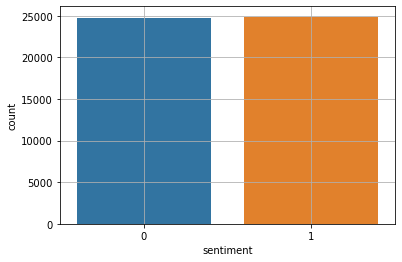

In [17]:
sns.countplot(x=df['sentiment'])
plt.grid()

In [20]:
print(f"There are about",df['sentiment'].value_counts()[0],"Positive reviews i.e.", round((df["sentiment"].value_counts()[0]/len(df["sentiment"])) * 100,2), "% of the dataset")
print(f"There are about",df['sentiment'].value_counts()[1],"Negative reviews i.e.", round((df["sentiment"].value_counts()[1]/len(df["sentiment"]))*100,2),"% of the dataset")

There are about 24698 Positive reviews i.e. 49.81 % of the dataset
There are about 24884 Negative reviews i.e. 50.19 % of the dataset


**Word Cloud to Visualize highly Frequent words present in Positive Reviews**

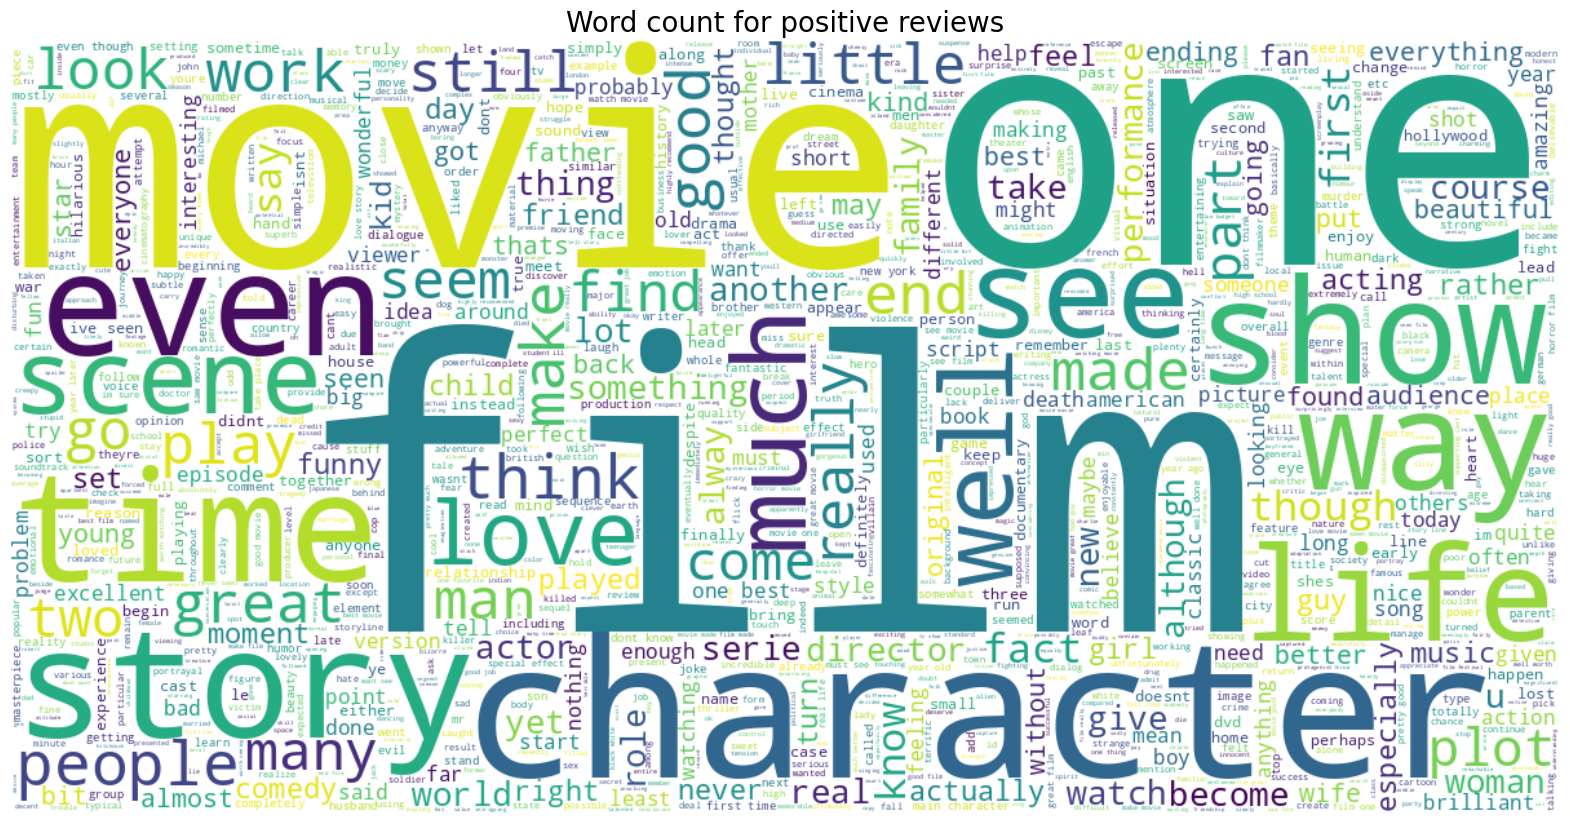

In [21]:
from wordcloud import WordCloud
positive_review = df[df.sentiment == 1]["review"]
positive_review_string = ' '.join(positive_review)
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1200,width = 1200, height=600,background_color= "white").generate(positive_review_string)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off') 
plt.title("Word count for positive reviews",fontsize=20)
plt.show()

**Word Cloud to Visualize Highly Frequent Words present in Negative Reviews**

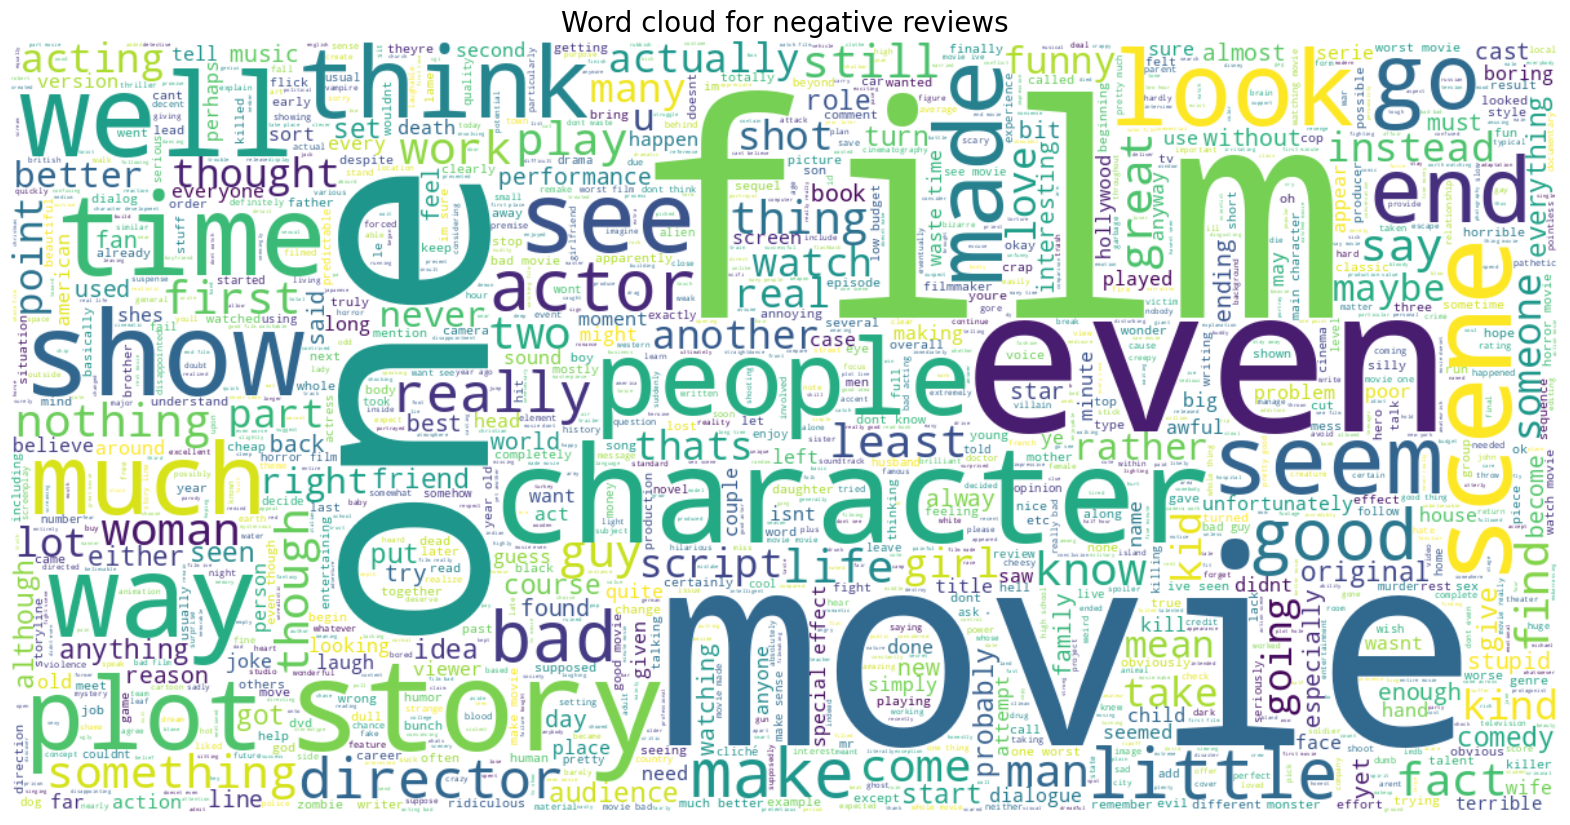

In [ ]:
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()


**Histogram to depict the Number of Words in Texts**

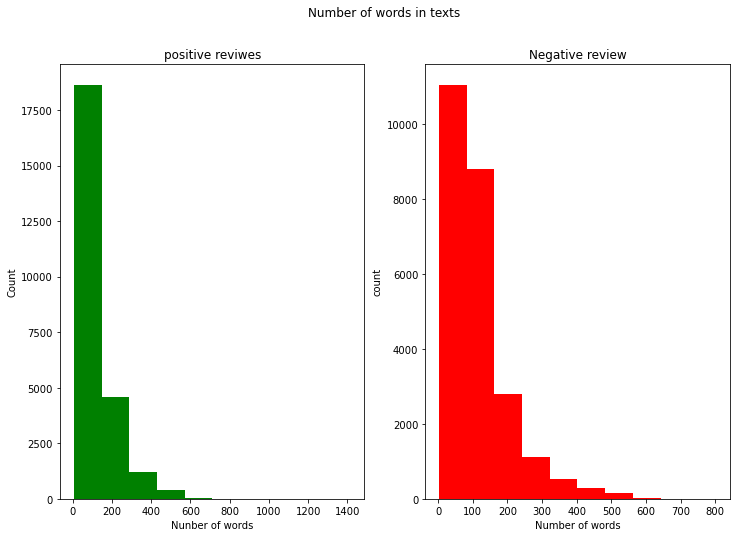

In [ ]:
fig,(axis1,axis2) =plt.subplots(1,2,figsize=(12,8))
text_len = positive_review.str.split().map(lambda x: len(x))
axis1.hist(text_len,color='green')
axis1.set_title("positive reviwes")
axis1.set_xlabel("Nunber of words")
axis1.set_ylabel("Count")
text_len = negative_data.str.split().map(lambda x: len(x))
axis2.hist(text_len,color="red")
axis2.set_title("Negative review")
axis2.set_xlabel("Number of words")
axis2.set_ylabel("count")
fig.suptitle("Number of words in texts")
plt.show()

**Analysis of Most Common Words**

In [ ]:
def get_corpus(data):
    corpus = []
    for i in data:
        for j in i.split():
            corpus.append(j.strip())
    return corpus
corpus = get_corpus(df.review)
corpus[:5]
    
            

['one', 'reviewer', 'mentioned', 'watching', 'oz']

In [ ]:
from collections import Counter
count = Counter(corpus)
most_words = count.most_common(10)
most_common = pd.DataFrame(most_words,columns=["words","count_"])
most_common

,words,count_
0,movie,100605
1,film,91130
2,one,53525
3,like,39746
4,time,30091
5,good,28905
6,character,27801
7,story,24600
8,even,24440
9,get,24328


In [ ]:
# Sorting 
most_common= most_common.sort_values('count_')

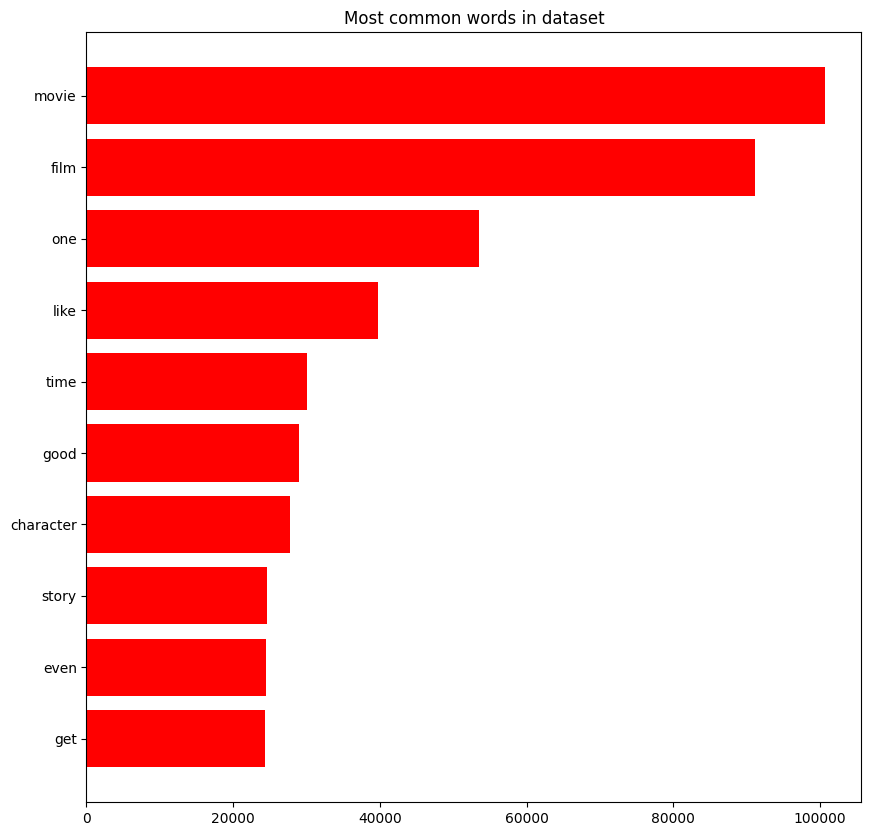

In [ ]:
plt.figure(figsize=(10,10))
plt.yticks(range(len(most_common)),list(most_common.words))
plt.barh(range(len(most_common)),list(most_common.count_),align='center',color = 'red')
plt.title("Most common words in dataset")
plt.show()

## Text preprocessing

In [ ]:
def convert_lowercase(col):
    col = col.str.lower()
    return col

**Removing the HTML tags**

In [ ]:
import re
def remove_html_tags(text):
    html = re.compile('<.*?>')
    return html.sub(r'', text)

**Removing URL's**

In [ ]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

**Splitting the Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(df["review"],df["sentiment"], test_size=0.33)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Creates and fits a TensorFlow Tokenizer
tokenizer = Tokenizer(num_words=10_000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_text)

#Creates sequences of numeric representations of words
training_sequences = tokenizer.texts_to_sequences(train_text)
#pads sequences so they all have the same length
training_sequences = pad_sequences(training_sequences, maxlen=20)

#Process test data in the same way for later evaluation
testing_sequences = tokenizer.texts_to_sequences(test_text)
testing_sequences = pad_sequences(testing_sequences, maxlen=20)

        
#prints a sample of the new sequences
print('processed text data')
for i in range(5):
    print(training_sequences[i], '\n')


processed text data
[ 443    2  347   21  442    3   64  165 1536 1169    1 1190 1399    2
  274    7    3  347   57  106] 

[1176   99  484    5 2330 3751   24 1638  756  295    2 1472 2955  205
    4   31  214  336    6    2] 

[ 194  101   28    2 1293   56   43    1   31 3830    1  311   50  454
  960 1918   25   34   10  173] 

[ 882    1  194  706   11 3079  669   70  535  230  120    2  286    6
  671  374  868 7007   18  680] 

[  80  122 6835   21 4569  482    2  319 8296  979 1323 3774  256  957
 1323  318  320    2 1619  901] 



In [ ]:
train_labels.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

**Custom Callback**\
This Function prevents Overfitting by stopping the Training Process when the training Accuracy crosses 95%

In [ ]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("Accuracy over 95%... Stopping training")
            self.model.stop_training = True

my_callback = CustomCallback()

**Pre defined Callbacks**\
This Function is used to update the Learning Rate based on the Epoch Value


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

#creates a function that updates the learning rate based on the epoch number
def scheduler(epoch, lr):
    if epoch < 2:
        return 0.01
    else:
        return lr * 0.99

lr_scheduler = LearningRateScheduler(scheduler)

# Model 1 - Bi-Directional LSTM

**Hyperparameter Tuning**\
To identify Best Parameters

**Implementation of Grid Search**

In [ ]:
#importing necessary libraries
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout

def create_model(neurons=512, lstm_units=150, dropout_rate1=0.4, dropout_rate2=0.5):
    #input dimensions is equal to number of words tokenized (defined above)
    input_dim = 10000
    # input length will be the length of our padded sequences
    input_length = 20
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=64, input_length=input_length),
        Bidirectional(LSTM(lstm_units)),
        Dropout(dropout_rate1),
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

param_grid = {'neurons': [256, 512], 'lstm_units':[100,150]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(
    np.array(training_sequences), #must convert to numpy array before sending to model
    np.array(train_labels),       #must convert to numpy array before sending to model
    epochs=100, 
    batch_size=128,                
    callbacks=[my_callback, lr_scheduler],verbose=1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-34-ff8cb3db291a>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Epoch 1/100
174/174 [==============================] - 31s 139ms/step - loss: 0.5212 - accuracy: 0.7439 - lr: 0.0100
Epoch 2/100
174/174 [==============================] - 26s 152ms/step - loss: 0.3602 - accuracy: 0.8460 - lr: 0.0100
Epoch 3/100
174/174 [==============================] - 24s 137ms/step - loss: 0.2320 - accuracy: 0.9081 - lr: 0.0099
Epoch 4/100
174/174 [==============================] - 23s 130ms/step - loss: 0.1386 - accuracy: 0.9457 - lr: 0.0098
Epoch 5/100
174/174 [==============================] - 23s 134ms/step - loss: 0.0942 - accuracy: 0.9655 - lr: 0.0097
Epoch 1/100
174/174 [==============================] - 28s 137ms/step - loss: 0.5183 - accuracy: 0.7463 - lr: 0.0100
Epoch 2/100
174/174 [==============================] - 22s 127ms/step - loss: 0.3497 - accuracy: 0.8549 - lr: 0.0100
Epoch 3/100
174/174 [==============================] - 24s 136ms/step - loss: 0.2209 - accuracy: 0.9147 - lr: 0.0099
Epoch 4/100
174/174 [==============================] - 24s 139ms

**Fitting Model-1**\
Here we fit the Model-1 with Best Parameters

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

#input dimensions is equal to number of words tokenized (defined above)
input_dim = 10000
# input length will be the length of our padded sequences
input_length = 20


#defines a text classifier model
model = Sequential([
    Embedding(input_dim=input_dim, output_dim=64, input_length=input_length),
    Bidirectional(LSTM(150)),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 20, 64)            640000    
                                                                 
 bidirectional_16 (Bidirecti  (None, 300)              258000    
 onal)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 300)               0         
                                                                 
 dense_32 (Dense)            (None, 512)               154112    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 513       
                                                     

In [ ]:
history_1 = model.fit(
    np.array(training_sequences), #must convert to numpy array before sending to model
    np.array(train_labels),       #must convert to numpy array before sending to model
    epochs=10, 
    batch_size=128,
    validation_data = (testing_sequences, test_labels),                
    callbacks=[my_callback, lr_scheduler],verbose=1)

Epoch 1/10
260/260 [==============================] - 55s 170ms/step - loss: 0.5033 - accuracy: 0.7562 - val_loss: 0.4624 - val_accuracy: 0.7818 - lr: 0.0100
Epoch 2/10
260/260 [==============================] - 47s 181ms/step - loss: 0.3677 - accuracy: 0.8419 - val_loss: 0.4627 - val_accuracy: 0.7814 - lr: 0.0100
Epoch 3/10
260/260 [==============================] - 42s 161ms/step - loss: 0.2667 - accuracy: 0.8899 - val_loss: 0.6123 - val_accuracy: 0.7692 - lr: 0.0099
Epoch 4/10
260/260 [==============================] - 45s 175ms/step - loss: 0.1795 - accuracy: 0.9307 - val_loss: 0.7512 - val_accuracy: 0.7676 - lr: 0.0098
Epoch 5/10
260/260 [==============================] - 43s 164ms/step - loss: 0.1247 - accuracy: 0.9533 - val_loss: 0.8799 - val_accuracy: 0.7613 - lr: 0.0097


**Plotting Training and Testing Accuracy v/s Epochs**

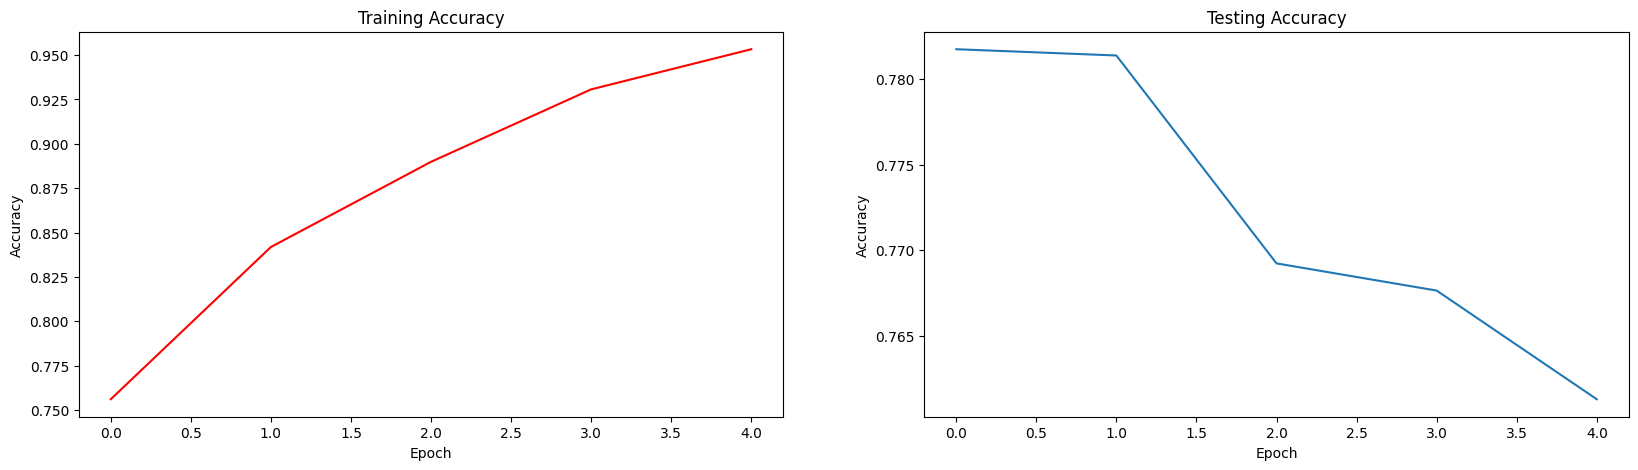

In [ ]:
#Plots history of model training
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(history_1.history['accuracy'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training Accuracy')

axs[1].plot(history_1.history['val_accuracy'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Testing Accuracy')

plt.show()

**Applying the Model on the Test Data**

In [ ]:
ctb_pred = model.predict(testing_sequences)
ctb_pred = np.where(ctb_pred>=0.5,1,0)
accuracy_score(test_labels,ctb_pred)*100

512/512 [==============================] - 12s 21ms/step


76.12907168612114

**Here, we see that Model-1 has given 76% Accuracy**

# Model-2 Unidirectional LSTM

**Hyperparamter Tuning**\
To get the Best Parameters, we applied Hyperparameter Tuning.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


number_of_words = 20000
max_len = 100
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=number_of_words)
tokenizer.fit_on_texts(df["review"])

X = tokenizer.texts_to_sequences(df["review"])
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

def Create_model(neurons = 128):
  
  model2 = tf.keras.Sequential()
  model2.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train.shape[1],)))
  model2.add(tf.keras.layers.LSTM(units=neurons, activation='tanh'))
  model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  return model2

grid_model = KerasClassifier(build_fn = Create_model, epochs=10, batch_size=32, verbose=0)

grid_model = KerasClassifier(build_fn=Create_model, epochs=10, batch_size=32, verbose=0)
param_grid = {'neurons': [64,128],
              'epochs': [3]}


grid = GridSearchCV(estimator=grid_model, param_grid=param_grid, cv=3)

grid_result = grid.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=128,callbacks=[my_callback, lr_scheduler],verbose=1)




print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-49-759b2e5f4e5d>:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasClassifier(build_fn = Create_model, epochs=10, batch_size=32, verbose=0)
<ipython-input-49-759b2e5f4e5d>:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasClassifier(build_fn=Create_model, epochs=10, batch_size=32, verbose=0)


Epoch 1/3
207/207 [==============================] - 45s 208ms/step - loss: 0.5294 - accuracy: 0.7438 - val_loss: 0.4334 - val_accuracy: 0.8022 - lr: 0.0100
Epoch 2/3
207/207 [==============================] - 40s 195ms/step - loss: 0.3206 - accuracy: 0.8691 - val_loss: 0.3215 - val_accuracy: 0.8611 - lr: 0.0100
Epoch 3/3
207/207 [==============================] - 43s 206ms/step - loss: 0.2094 - accuracy: 0.9213 - val_loss: 0.3221 - val_accuracy: 0.8661 - lr: 0.0099
Epoch 1/3
207/207 [==============================] - 40s 184ms/step - loss: 0.4984 - accuracy: 0.7628 - val_loss: 0.3590 - val_accuracy: 0.8420 - lr: 0.0100
Epoch 2/3
207/207 [==============================] - 38s 184ms/step - loss: 0.3159 - accuracy: 0.8690 - val_loss: 0.3059 - val_accuracy: 0.8732 - lr: 0.0100
Epoch 3/3
207/207 [==============================] - 38s 183ms/step - loss: 0.2089 - accuracy: 0.9204 - val_loss: 0.3529 - val_accuracy: 0.8683 - lr: 0.0099
Epoch 1/3
207/207 [==============================] - 42s 1

**Fitting the Best Parameters to the Model-2**

In [ ]:
#Data Preprocessing
number_of_words = 20000
max_len = 100
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=number_of_words)
tokenizer.fit_on_texts(df["review"])
X = tokenizer.texts_to_sequences(df["review"])
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

#Declaring the Model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train.shape[1],)))
model2.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()






Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 100, 128)          2560000   
                                                                 
 lstm_36 (LSTM)              (None, 128)               131584    
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2=model2.fit(X_train, y_train, epochs=6, batch_size=128,
                    callbacks=[my_callback, lr_scheduler],
                    verbose=1,validation_data = (X_test, y_test))

Epoch 1/6
310/310 [==============================] - 103s 319ms/step - loss: 0.5097 - accuracy: 0.7498 - val_loss: 0.3087 - val_accuracy: 0.8704 - lr: 0.0100
Epoch 2/6
310/310 [==============================] - 97s 313ms/step - loss: 0.2703 - accuracy: 0.8927 - val_loss: 0.2965 - val_accuracy: 0.8707 - lr: 0.0100
Epoch 3/6
310/310 [==============================] - 97s 314ms/step - loss: 0.1893 - accuracy: 0.9282 - val_loss: 0.2819 - val_accuracy: 0.8841 - lr: 0.0099
Epoch 4/6
310/310 [==============================] - 98s 316ms/step - loss: 0.1356 - accuracy: 0.9528 - val_loss: 0.3391 - val_accuracy: 0.8733 - lr: 0.0098


**Plotting Training and Testing Accuracy v/s Epochs**

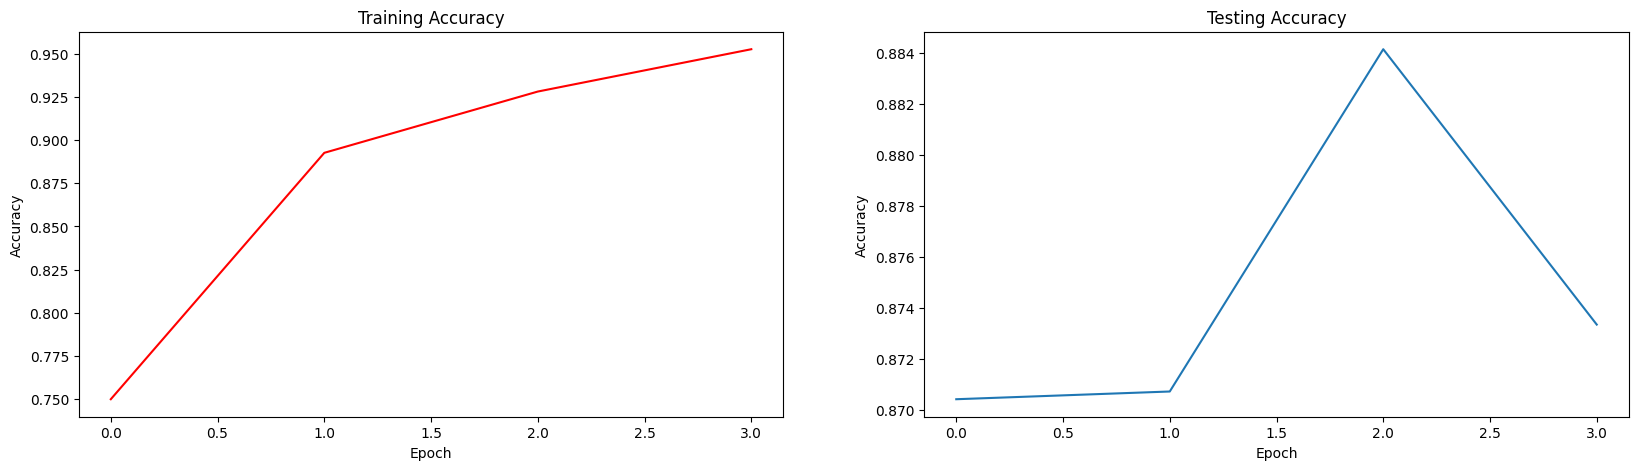

In [ ]:
#Plots history of model training
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(history2.history['accuracy'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training Accuracy')

axs[1].plot(history2.history['val_accuracy'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Testing Accuracy')

plt.show()

**Applying the Model-2 on the Test Data**

In [ ]:
test_loss, test_acurracy = model2.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_acurracy))
print("Test Loss: {}".format(test_loss))

310/310 [==============================] - 14s 45ms/step - loss: 0.3391 - accuracy: 0.8733
Test accuracy: 0.8733487725257874
Test Loss: 0.3390832245349884


# Model-3 CNN with Bidirectional LSTM

**Hyperparameter Tuning**\
To identify Best Parameters

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense, LSTM, Embedding, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

# max_features = 30000 # Number of words in our vocabulary
max_len = 512 # length of the output vectors

vectorize_layer = TextVectorization(output_mode = 'int', output_sequence_length = max_len)
vectorize_layer.adapt(train_text) 
vocab_len = len(vectorize_layer.get_vocabulary())

def Create_model3(neurons =128):
  model3 = Sequential()
  model3.add(Input(shape=(1,), dtype = tf.string))
  model3.add(vectorize_layer)
  model3.add(Embedding(input_dim = vocab_len, output_dim = 256, input_length= max_len))
  model3.add(Conv1D(32, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
  model3.add(Conv1D(16, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
  model3.add(MaxPooling1D(4, 1, padding = 'same'))
  model3.add(tf.keras.layers.Bidirectional(LSTM(neurons, kernel_regularizer = l2(0.0001))))
  model3.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.0001)))
  model3.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.0001)))
  model3.add(Flatten())
  model3.add(Dense(1, activation = 'sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
  model3.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model3





grid_model = KerasClassifier(build_fn = Create_model3, epochs=10, batch_size=32, verbose=0)

grid_model = KerasClassifier(build_fn=Create_model3, epochs=10, batch_size=32, verbose=0)
param_grid = {'neurons': [64,128],
              'epochs': [6]}


grid = GridSearchCV(estimator=grid_model, param_grid=param_grid, cv=3)

grid_result = grid.fit(train_text, train_labels, validation_data = (test_text, test_labels), batch_size=128,callbacks=[my_callback, lr_scheduler],verbose=1)




print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-36-48f1d81c5b86>:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasClassifier(build_fn = Create_model3, epochs=10, batch_size=32, verbose=0)
<ipython-input-36-48f1d81c5b86>:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasClassifier(build_fn=Create_model3, epochs=10, batch_size=32, verbose=0)


Epoch 1/6
174/174 [==============================] - 592s 3s/step - loss: 0.6954 - accuracy: 0.4974 - val_loss: 0.6933 - val_accuracy: 0.5002 - lr: 0.0100
Epoch 2/6
174/174 [==============================] - 610s 4s/step - loss: 0.6934 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.4998 - lr: 0.0100
Epoch 3/6
174/174 [==============================] - 579s 3s/step - loss: 0.6933 - accuracy: 0.4939 - val_loss: 0.6932 - val_accuracy: 0.5002 - lr: 0.0099
Epoch 4/6
174/174 [==============================] - 579s 3s/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4998 - lr: 0.0098
Epoch 5/6
174/174 [==============================] - 579s 3s/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6934 - val_accuracy: 0.5002 - lr: 0.0097
Epoch 6/6
174/174 [==============================] - 579s 3s/step - loss: 0.6933 - accuracy: 0.5001 - val_loss: 0.6933 - val_accuracy: 0.5002 - lr: 0.0096
Epoch 1/6
174/174 [==============================] - 593s 3s/step - lo

**Fitting the Best Parameters to the Model-3**

In [ ]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense, LSTM, Embedding, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

#Vectorization
max_len = 512 # length of the output vectors
vectorize_layer = TextVectorization(output_mode = 'int', output_sequence_length = max_len)
vectorize_layer.adapt(train_text) 
vocab_len = len(vectorize_layer.get_vocabulary())


#Fitting the Model-3
model3 = Sequential()
model3.add(Input(shape=(1,), dtype = tf.string))
model3.add(vectorize_layer)
model3.add(Embedding(input_dim = vocab_len, output_dim = 256, input_length= max_len))
model3.add(Conv1D(32, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model3.add(Conv1D(16, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model3.add(MaxPooling1D(4, 1, padding = 'same'))
model3.add(tf.keras.layers.Bidirectional(LSTM(64, kernel_regularizer = l2(0.0001))))
model3.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.0001)))
model3.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.0001)))
model3.add(Flatten())
model3.add(Dense(1, activation = 'sigmoid'))



In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model3.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_7 (TextV  (None, 512)              0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 512, 256)          29163520  
                                                                 
 conv1d_10 (Conv1D)          (None, 512, 32)           40992     
                                                                 
 conv1d_11 (Conv1D)          (None, 512, 16)           2576      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 512, 16)          0         
 1D)                                                             
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)             

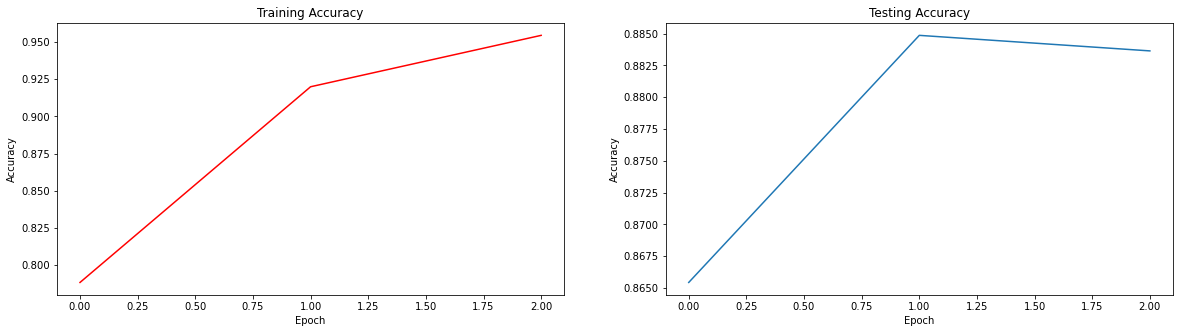

In [ ]:
#Plots history of model training
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(1, 2)
axs[0].plot(history3.history['accuracy'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training Accuracy')
axs[1].plot(history3.history['val_accuracy'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Testing Accuracy')
plt.show()

**Applying the Model-3 on the Test Data**

In [ ]:
history3 = model3.fit(train_text, train_labels,epochs= 6, validation_data = (test_text, test_labels),callbacks=[my_callback],verbose=1)

Epoch 1/6
1039/1039 [==============================] - 493s 471ms/step - loss: 0.4465 - accuracy: 0.7884 - val_loss: 0.3344 - val_accuracy: 0.8654
Epoch 2/6
1039/1039 [==============================] - 477s 459ms/step - loss: 0.2221 - accuracy: 0.9200 - val_loss: 0.2969 - val_accuracy: 0.8849
Epoch 3/6
1039/1039 [==============================] - 465s 448ms/step - loss: 0.1426 - accuracy: 0.9545 - val_loss: 0.3439 - val_accuracy: 0.8836


**After fitting the model, we see that the Validation Accuracy is 88.36%**

# Conclusion


Based on the provided information, we can make the following conclusions:
* The Bi-directional LSTM model has the lowest test accuracy (76.13%) among the three models.
* LSTM unidirectional model has a higher test accuracy (87.33%) than the Bi-directional LSTM model.
* LSTM with the CNN model has the highest test accuracy (88.36%) among the three models <br>

The LSTM with CNN model performed the best in terms of test accuracy. However, considering time taken to build the model, the LSTM Unidirectional Model took lesser time to train and still provided a very good accuracy.